## Data 01 : 스타워즈(Starwars)
- 스타워즈API (SWAP)의 데이터로 스타워즈에 등장하는 캐릭터들 특징 설명
- Data from : 패스트캠퍼스 '한 번에 끝내는 데이터 분석 초격차 패키지 Online.'

## 1. 데이터 둘러보기

In [53]:
# 한글 폰트 설정하기
!sudo apt-get install -y fonts nanum
!sudo fc-cache -fv
!rm ~/. cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [1]:
# 기본 패키지 import
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 나눔바른고딕 폰트 가져오기

plt.style.use('seaborn') #그래프 기본 설정
sns.set(font_scale=1)

import warnings # 경고 메시지 무시
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# 데이터 불러오기
sw = pd.read_csv('./Starwars.csv')

In [3]:
# 불러온 데이터 확인하기
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


### <Column 설명>
- name : 이름
- height : 키(cm)
- mass : 몸무게(kg)
- hair_color : 머리카락색
- skin_color : 눈동자 색
- birth_year : 생년
- sex : 생물학적 성별
- gender : 사회적 성별
- homeworld : 고향
- species : 종족

##### 범주형 변수 : 빈도 ( Frequency ) 계산 가능
> name, hair_color, skin_color, eye_color, sex, gender, homeworld, species

##### 연속형 변수 : 평균, 표준편차, min/max 등 수치 계산 가능
> heigth, mass, birth_year


In [4]:
# 컬럼 기본 정보 확인하기
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [5]:
# 연속형(수치) 데이터의 통계치 확인하기
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [7]:
# 범주형 데이터의 통계치 확인하기
sw.describe(include=np.object_)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [10]:
# 범주형 데이터 컬럼 안에는 어떤 내용이 들어있는지 확인
print('Hair color:', sw['hair_color'].unique())
print('Skin color:', sw['skin_color'].unique())
print('Eye color:', sw['eye_color'].unique())
print('Sex:', sw['sex'].unique())
print('Gender:', sw['gender'].unique())
print('Home-world:', sw['homeworld'].unique())
print('Species:', sw['species'].unique())
# 범주가 적으면 범주 별 그래프를 그리기가 쉽다.
#이 데이터에서는 sex, gender

Hair color: ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin color: ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye color: ['blue' 'yellow' 'red' 'brown' 'blue-gray' 'black' 'orange' 'hazel' 'pink'
 'unknown' 'red, blue' 'gold' 'green, yellow' 'white' 'dark']
Sex: ['male' 'none' 'female' 'hermaphroditic' nan]
Gender: ['masculine' 'feminine' nan]
Home-world: ['Tatooine' 'Naboo' 'Alderaan' 'Stewjon' 'Eriadu' 'Kashyyyk' 'Corellia'
 'Rodia' 'Nal Hutta' 'Bestine IV' nan 'Kamino' 'Trandosha' 'Socorro'
 'Bespin' 'Mon Cala' 'Chandrila' 'Endor' 'Sullust' 'Cato Neimoidia'
 'Coruscant' 'Toydaria' 'Malastare' '

In [29]:
# 데이터 내용을 간단하게 정리해서 출력하기
print("총 데이터 개수 :", sw.shape[0]*sw.shape[1])
print("총 결측치 수 : {} = 전체 데이터의 {: 2f}% ".format(sw.isnull().sum().sum(),(sw.isnull().sum().sum()*100)/(sw.shape[0]*sw.shape[1])))
print("스타워즈에 등장하는 등장인물 수 : ",sw['name'].nunique())
print("스타워즈에 등장하는 종족 수 : ", sw['species'].nunique())

총 데이터 개수 : 957
총 결측치 수 : 105 = 전체 데이터의  10.971787% 
스타워즈에 등장하는 등장인물 수 :  87
스타워즈에 등장하는 종족 수 :  37


## 2. 데이터를 보고 질문 만들기
- 스타워즈 캐릭터의 성별 비율은 ? 
- 성별에 따른 캐릭터의 신장 분포는 ?
- 가장 뭐운 캐릭터와 가장 가벼운 캐릭터는 ? 
- 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까 ?

## 3. 데이터 정비하기 ( 데이터 전처리 )

#### 3-1. 결측치 처리하기

In [30]:
# Null 값이 존재하는 컬럼 확인하기
sw.isnull().any(axis=0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [31]:
#컬럼별로 Null 개수 확인하기
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [33]:
# 어떤 컬럼의 결측치를 처리할 것인가?
# hair_color, sex, gender, homeworld, species의 경우 개인 특성이므로 다른 값을 넣어주는 의미가 있다.
# height, mass에서는 결측치를 0으로 처리한다.
sw['height'].fillna(0, inplace=True)
sw['mass'].fillna(0, inplace=True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [35]:
# 결측치 처리 확인하기
sw.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [43]:
# sex에 none도 있고 Nan도 있다?
sw[sw['sex'] == 'none']

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
7,R5-D4,97.0,32.0,NaN,"white, red",red,NaN,none,masculine,Tatooine,Droid
21,IG-88,200.0,140.0,none,metal,red,15.0,none,masculine,NaN,Droid
72,R4-P17,96.0,0.0,none,"silver, red","red, blue",NaN,none,feminine,NaN,Droid
84,BB8,0.0,0.0,none,none,black,NaN,none,masculine,NaN,Droid


In [42]:
sw[sw['sex'].isnull()]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
36,Ric Oli?,183.0,0.0,brown,fair,blue,NaN,NaN,NaN,Naboo,NaN
39,Quarsh Panaka,183.0,0.0,black,dark,brown,62.0,NaN,NaN,Naboo,NaN
79,Sly Moore,178.0,48.0,none,pale,white,NaN,NaN,NaN,Umbara,NaN
85,Captain Phasma,0.0,0.0,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN


In [44]:
# sex = none 인 것들은 species = Droid이므로, 컬럼 내용을 바꾸자.
sw['sex'][(sw['sex']=='none')] = 'robot'
print('Sex: ',sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


C:\Users\hwan\AppData\Local\Temp\ipykernel_10572\980417877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['sex'][(sw['sex']=='none')] = 'robot'


## 4. EDA & Visualization

#### 4-1. 스타워즈 캐릭터들의 성별 비율

In [49]:
# 스타워즈 캐릭터의 성비( sex, gender) 는 ?
sw['gender'].value_counts()
sw['sex'].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

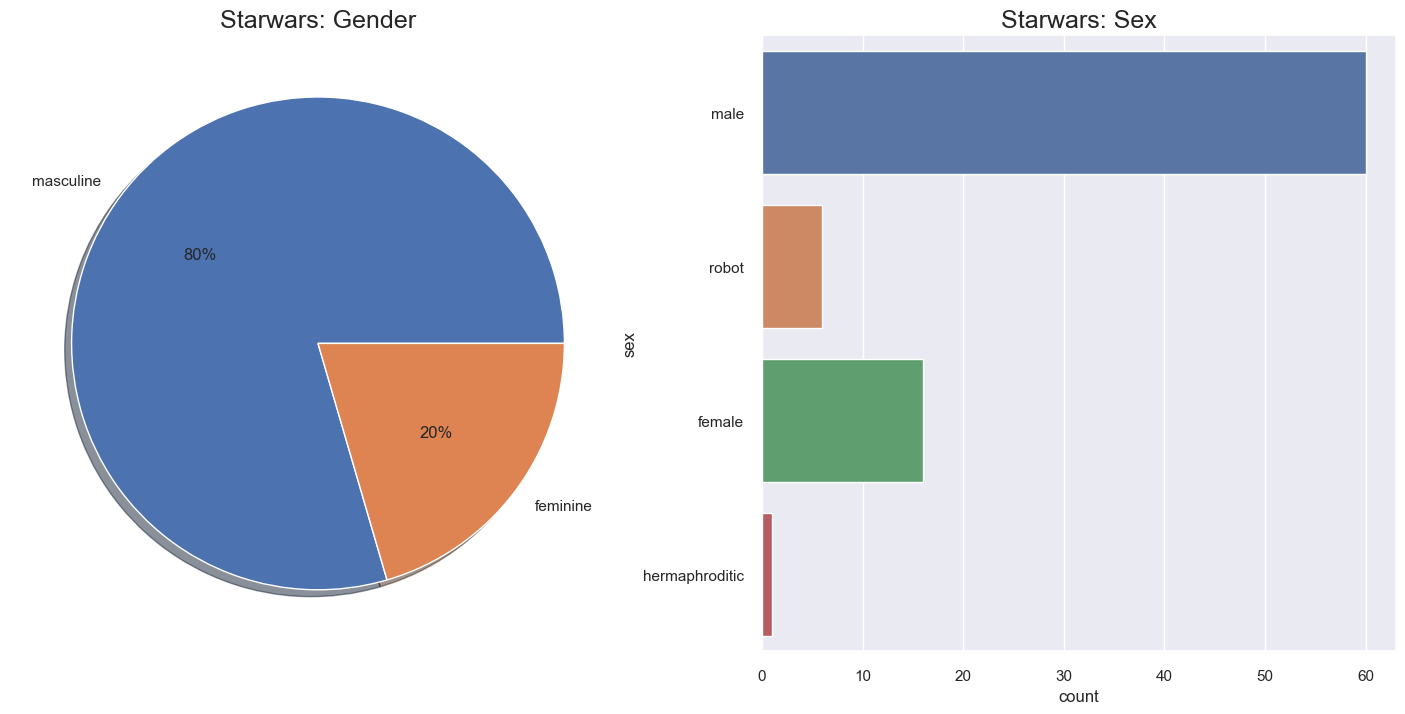

In [56]:
f, ax = plt.subplots(1, 2, figsize=(18,8)) # 그래프 틀 정하기
# sns.pieplot
sw['gender'].value_counts().plot.pie(ax=ax[0], autopct='%1.0f%%', shadow=True) # 파이그래프 생성
ax[0].set_title('Starwars: Gender', size=18) # 그래프 제목 지정
ax[0].set_ylabel('') # y라벨 없애기

# sns.countplot
# 항목별 갯수를 세어주는 countplot
# 알아서 해당 column을 구성하고 있는 value들을 구분하여 보여준다.
# 차트 가로로 그리기 : x를 y로 변경하면 세로에서 가로 차트로 변경 가능
sns.countplot(y='sex', data=sw, ax=ax[1])
ax[1].set_title('Starwars: Sex', size=18) # 그래프 제목 지정

plt.show()

#### 4-2. 스타워즈 캐릭터의 성별에 따른 신장 분포

In [57]:
# 스타워즈 캐릭터의 신장 확인하기
# 연속형(수치) 데이터의 통계치 확인하기 : 최솟값과 최댓값
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [59]:
# skewness and kurosis 구하기
# Skewness(왜도) : 데이터가 정규부포에서 한 쪽으로 치우쳐있는가?
#                -3 < Skewneww < 3 사이의 값이면 기준에 부합한다.
# Kurtosis(첨도) : 얼마나 뾰족한가 ( 데이터가 얼마나 평균 근처에 몰려있는가 ? )
#                : 정규분포의 kurtosis = 0
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.760878
Kurtosis: 2.927697


In [60]:
# 자웅동체(hermaphroditic) 캐릭터 (Jabba Desilijic Tiure)는 하나 뿐이므로 확률 분포를 구하는 것이 불가능
sw[sw['sex']== 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


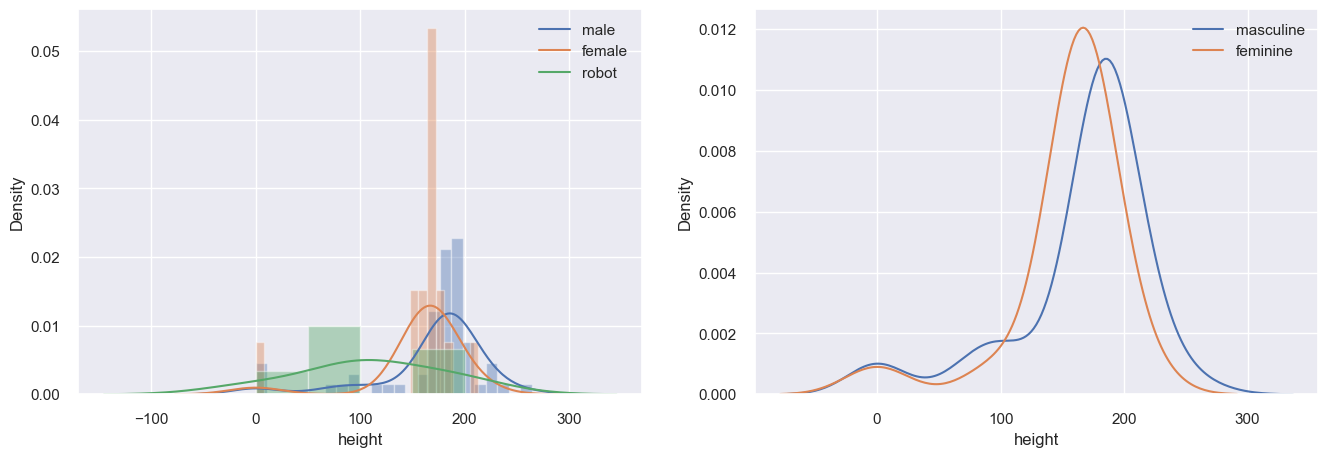

In [67]:
# 성별에 따른 스타워즈 캐릭터의 신장 분포 그래프
# 자웅동체 캐릭터는 하나뿐이므로 확률 분포를 구하는 것이 불가능
f, ax = plt.subplots(1, 2, figsize=(16,5))

# sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax=ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax=ax[0])
ax[0].legend(['male','female','robot'])

# sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax=ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax=ax[1])
ax[1].legend(['masculine','feminine'])

plt.show()

#### 4-3.가장 가벼운 캐릭터와 가장 무거운 캐릭터

In [68]:
# 몸무게가 가장 가벼운 캐릭터
notz = sw[sw['mass'] != 0] # 몸무게가 0인 것은 제외
min(notz['mass'])

15.0

In [69]:
# 데이터 내용 정리해서 출력하기
print('{}의 몸무게가 {} (으)로 가장 가볍다'.format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print('{}의 몸무게가 {} (으)로 가장 무겁다'.format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 무겁다


#### 4-4. 스타워즈 캐릭터의 종족 간 몸무게 비교

In [71]:
# Groupby로 스타워즈 종족 별 평균 몸무게를 계산
weight = sw[['species', 'mass']].groupby(['species'], as_index=True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


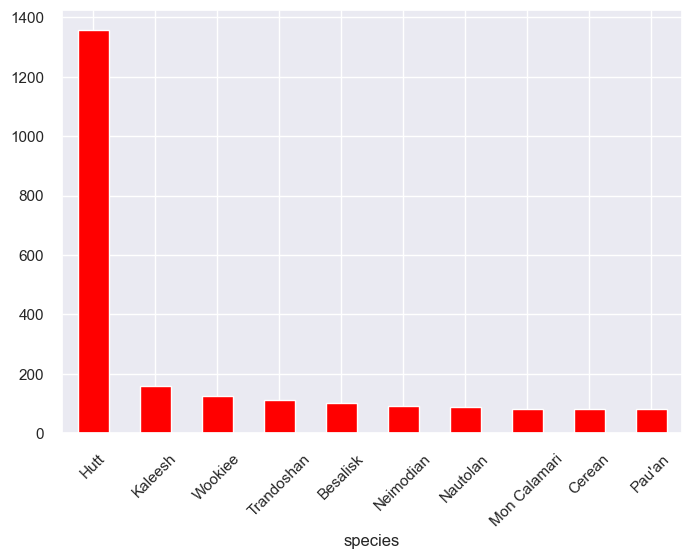

In [73]:
# 몸무게 많은 순으로 상위 10개 종족을 그래프로 출력
weight['mass'].sort_values(ascending=False).head(10).plot.bar(color='red')

plt.xticks(rotation=45)
plt.show()

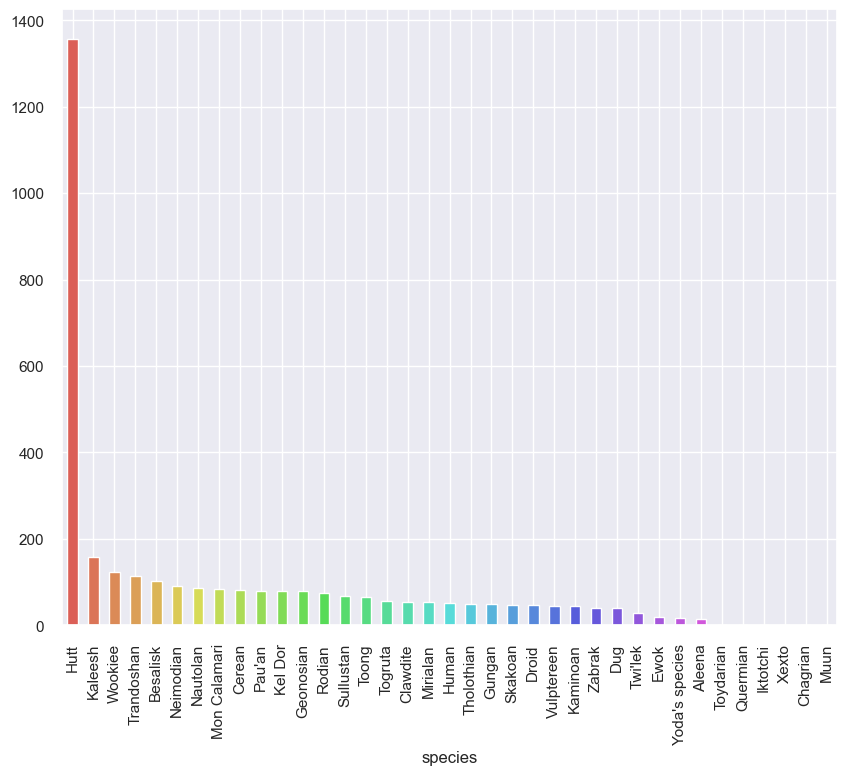

In [76]:
# 스타워즈 종족별 몸무게 높은 순으로 그래프 출력
f, ax = plt.subplots(1, 1, figsize=(10,8))

colors = sns.color_palette('hls', len(weight['mass'])) # hls라는 컬러팔레트에 어떤 컬러를 입힐지 설정

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(),rotation=90) #라벨을 90도로 전환

plt.show()

#### 4-5. 스타워즈 캐릭터의 무게-키 상관관계

In [80]:
# Hutt은 몸무게가 너무 이상치(Outlier)이므로 드롭시킨다.
# 몸무게가 0인 것도 제외
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin([0])
sw[~out1][~out2].shape

C:\Users\hwan\AppData\Local\Temp\ipykernel_10572\3125123058.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sw[~out1][~out2].shape


(58, 11)

C:\Users\hwan\AppData\Local\Temp\ipykernel_10572\2638965260.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(data=sw[~out1][~out2], x='height', y='mass', hue='gender') # hue = gender로 나타내 서도 살펴보기


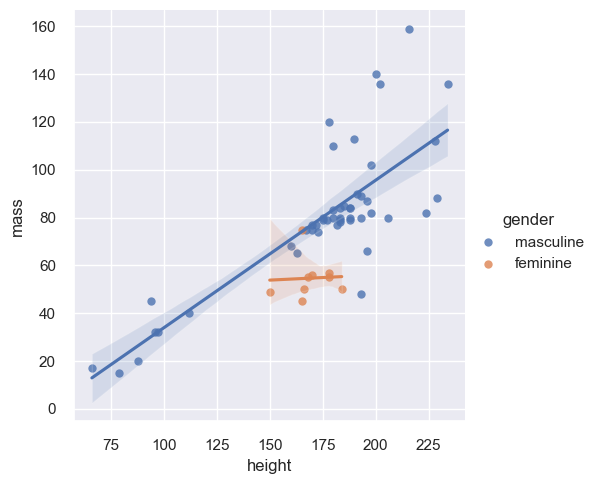

In [83]:
# 두 데이터 사이의 상관관계를 나타내주는 lmplot
# replot은 점만 출력 

sns.lmplot(data=sw[~out1][~out2], x='height', y='mass', hue='gender') # hue = gender로 나타내 서도 살펴보기
sns.set_style(style='darkgrid') # 어두운 그리드로 배경 지정


plt.show()

#### 5.Review
- 스타워즈 데이터<br>
총 데이터 개수 : 957<br>
총 결측치 수 : 105 = 전체 데이터 10.97%<br>
스타워즈에 등장하는 등장인물 수 : 87<br>
스타워즈에 등장하는 종족 수 : 37<br>

- 스타워즈 캐릭터의 성별 비율<br>
: 남성/남성 gender를 가진 캐릭터가 80% 가량 차지<br>

- 성별에 따른 캐릭터의 신장 분포는 ?<br>
: 남성 태릭터의 키가 대체로 여성보다 크며, 로봇은 그보다 키가 작다.<br>

- 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?<br>
['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다.<br>
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 가볍다.<br>

- 스타워즈 캐릭터의 키와 몸무게의 상관관계<br>
: 인간과 다른 행성에 사는 종족이지만, 키와 몸무게는 대체로 비례관계에 있다. <br>